In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special

In [92]:
res = 100
x = np.linspace(0,1,num=res)

# Enter your function here
def f(x):
    return np.sin(x)

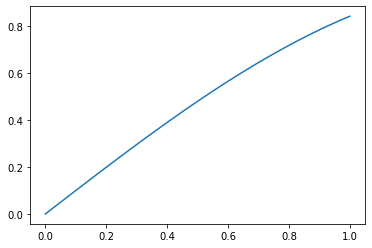

In [93]:
# What your function looks like on this interval
plt.plot(x,f(x))

In [94]:
# Define the bernstein function.
def bernstein(f,x,n):
    bernstein_vals = np.zeros(x.shape)
    for m in range(n+1):
        bernstein_vals += scipy.special.binom(n,m)*(x**m)*(1-x)**(n-m)*f(m/n)
    return bernstein_vals
    

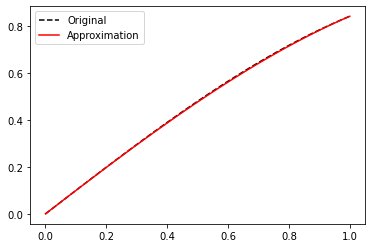

In [95]:
# Plot original vs. approximated function
plt.plot(x,f(x),'k--',label="Original")
plt.plot(x,bernstein(f,x,20),'r',label = "Approximation")
plt.legend()

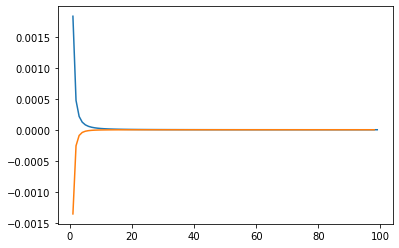

In [103]:
# Plot MSE graph
mse = np.array([])
n_vals = np.arange(1,100,1)

for n in n_vals:
    square_error = (f(x)-bernstein(f,x,n))**2
    mean_square_error = np.sum(square_error)/res
    mse = np.append(mse,mean_square_error)
    
plt.plot(n_vals,mse)

# Find where it stops changing a lot
delta_mse = mse[1:]-mse[:-1]
plt.plot(n_vals[:-1],delta_mse)